## 绘图方法

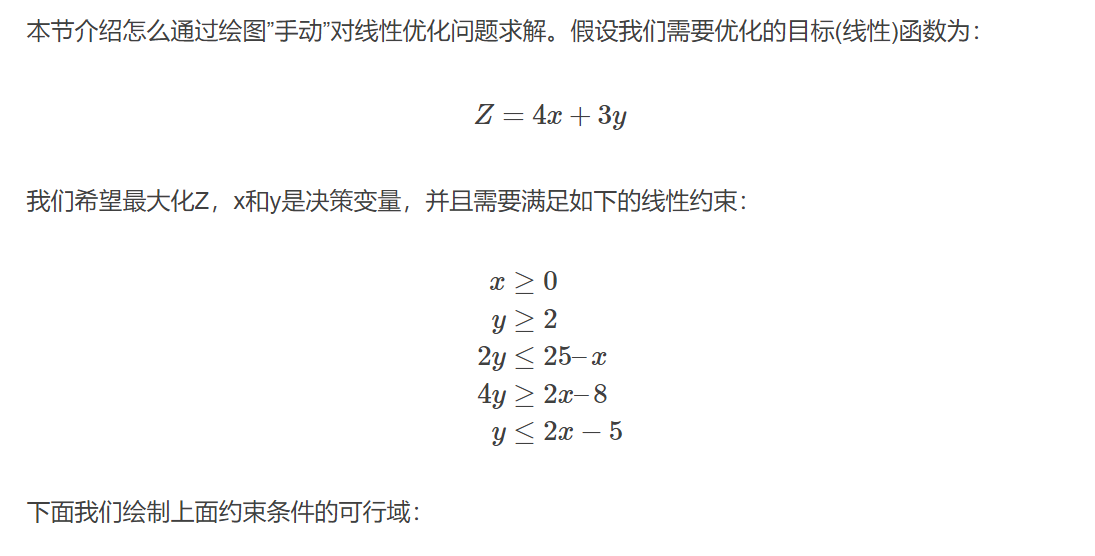

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

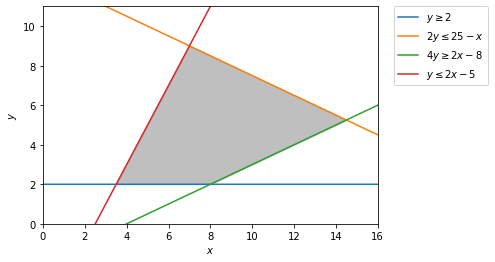

In [26]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)

# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8
y3 = (2*x-8)/4.0
# y <= 2x - 5
y4 = 2 * x - 5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')

# x,y 显示区域
plt.xlim((0, 16))
plt.ylim((0, 11))
# x,y 直线区域
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
# y2,y4为小于
# y1,y3为大于
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)

# 最大化Z minimum<maximum
plt.fill_between(x, y5, y6, where=y5 > y6, color='grey', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### test

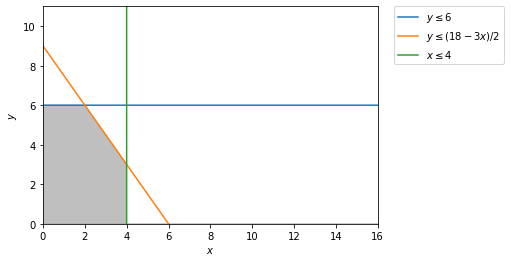

In [46]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)

# y <= 6
y1 = 6+0*x
# y <= (18 - 3x)/2
y2 = (18-3*x)/2
# x <= 4
y3 = 999999*(-x+4)

# Make plot
plt.plot(x, y1, label=r'$y\leq6$')
plt.plot(x, y2, label=r'$y\leq(18-3x)/2$')
plt.plot(x, y3, label=r'$x\leq4$')


# x,y 显示区域
plt.xlim((0, 16))
plt.ylim((0, 11))
# 坐标轴图例
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
# y2,y4为小于
# y1,y3为大于
y5 = np.minimum(y1, y2)
y6 = np.minimum(y5, y3)


# 最大化Z minimum<maximum
plt.fill_between(x, y6, color='grey', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### 获得交点的方法

[          nan           nan           nan           nan           nan
  665.99751398           nan           nan           nan           nan
           nan           nan           nan           nan 1006.19748525
           nan]
[          nan           nan           nan           nan           nan
 1099.39776259           nan           nan           nan           nan
           nan           nan           nan           nan 1405.57773673
           nan]


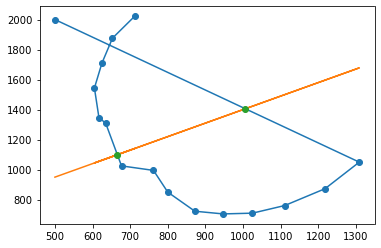

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 第一条折线
x1 = np.array([712,653,625,605,617,635,677,762,800,872,947,1025,1111,1218,1309, 500])
y1 = np.array([2022,1876,1710,1544,1347,1309,1025,995,850,723,705,710,761,873,1050, 2000])

# 第二条直线
x_start = np.min(x1)
x_end = np.max(x1)+1

x_line = x1.copy()
y_line = x_line * 0.9 + 500


# 开始处理
y=y1-y_line
nLen=len(x1)
xzero=np.zeros((nLen,))
yzero=np.zeros((nLen,))
for i in range(nLen-1):
    if np.dot(y[i], y[i+1]) == 0:#   %等于0的情况
        if y[i]==0:
            xzero[i]=i
            yzero[i]=0
        if y[i+1] == 0:
            xzero[i+1]=i+1
            yzero[i+1]=0
    elif np.dot(y[i],y[i+1]) < 0:# %一定有交点，用一次插值
        yzero[i] = np.dot(abs(y[i]) * y_line[i+1] + abs(y[i+1])*y_line[i], 1/(abs(y[i+1])+abs(y[i])))
        xzero[i] = (yzero[i]-500)/0.9
    else:
        pass            

for i in range(nLen):
    if xzero[i]==0 and (yzero[i]==0):#     %除掉不是交点的部分
        xzero[i]=np.nan
        yzero[i]=np.nan

#X点，Y点坐标数组对应
print(xzero)
print(yzero)


#画线
plt.plot(x1, y1, 'o-')
#画交点
plt.plot(x_line,y_line,xzero,yzero,'o')
plt.show()


## 普通线性规划

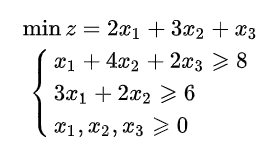

### scipy

In [1]:
import numpy as np
from scipy import optimize as op

In [2]:
# 定义目标函数系数
c = np.array([2, 3, 1])


# 定义约束条件系数
A_ub = np.array([[-1, -4, -2],
                 [-3, -2, 0]])

B_ub = np.array([-8, -6])


# 定义决策变量范围
x1 = (0, None)
x2 = (0, None)
x3 = (0, None)

# 求解
res = op.linprog(c, A_ub, B_ub, bounds=(x1, x2, x3))
res

     con: array([], dtype=float64)
     fun: 6.999999994872994
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 3.85261245e-09, -1.41066252e-08])
  status: 0
 success: True
       x: array([1.17949641, 1.23075538, 0.94874104])

### pulp

In [2]:
import pulp

In [4]:
#目标函数的系数
z = [2, 3, 1]
#约束
a = [[1, 4, 2], [3, 2, 0]]
b = [8, 6]
#确定最大化最小化问题，最大化只要把Min改成Max即可
m = pulp.LpProblem(sense=pulp.LpMinimize)
#定义三个变量放到列表中
x = [pulp.LpVariable(f'x{i}', lowBound=0) for i in [1,2,3]]
#定义目标函数，lpDot可以将两个列表的对应位相乘再加和
#相当于z[0]*x[0]+z[1]*x[0]+z[2]*x[2]
m += pulp.lpDot(z, x)

#设置约束条件
for i in range(len(a)):
    m += (pulp.lpDot(a[i], x) >= b[i])
#求解
m.solve()
#输出结果
print(f'优化结果：{pulp.value(m.objective)}')
print(f'参数取值：{[pulp.value(var) for var in x]}')

#output:
#优化结果：7.0
#参数取值：[2.0, 0.0, 3.0]

优化结果：7.0
参数取值：[2.0, 0.0, 3.0]


### pulp 定义方法（看起来更舒服）

In [23]:
# LpMinimize 最小值 LpMaximize
prob = pulp.LpProblem('problem name', sense=pulp.LpMinimize)

# lowBound下限; upBound上限；
# cat默认为连续变量，LpInteger离散变量，LpBinary二值变量
x1 = pulp.LpVariable('x1', lowBound=0, upBound=None, cat=pulp.LpInteger)
x2 = pulp.LpVariable('x2', lowBound=0, upBound=None, cat=pulp.LpInteger)
x3 = pulp.LpVariable('x3', lowBound=0, upBound=None, cat=pulp.LpInteger)

# 添加目标函数
prob += 2*x1 + 3*x2 + x3

# 添加约束
prob += (x1 + 4*x2 + 2*x3 >= 8)
prob += (3*x1 + 2*x2 >= 6)

# 打印题目
print(prob)

# 自动求解
prob.solve()

# 打印优化结果
print(f'result: {pulp.value(prob.objective)}')
print(f'x1: {pulp.value(x1)}')
print(f'x2: {pulp.value(x2)}')
print(f'x3: {pulp.value(x3)}')

problem_name:
MINIMIZE
2*x1 + 3*x2 + 1*x3 + 0
SUBJECT TO
_C1: x1 + 4 x2 + 2 x3 >= 8

_C2: 3 x1 + 2 x2 >= 6

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer

problem_name:
MINIMIZE
2*x1 + 3*x2 + 1*x3 + 0
SUBJECT TO
_C1: x1 + 4 x2 + 2 x3 >= 8

_C2: 3 x1 + 2 x2 >= 6

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer

result: 7.0
x1: 2.0
x2: 0.0
x3: 3.0


E:\Anaconda\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [3]:
# LpMinimize 最小值 LpMaximize
prob = pulp.LpProblem('problem_name', sense=pulp.LpMaximize)

# lowBound下限; upBound上限；
# cat默认为连续变量，pulp.LpInteger离散变量，LpBinary二值变量
x1 = pulp.LpVariable('x1', lowBound=0, upBound=None, cat=pulp.LpInteger)
x2 = pulp.LpVariable('x2', lowBound=0, upBound=None, cat=pulp.LpInteger)
x3 = pulp.LpVariable('x3', lowBound=0, upBound=None, cat=pulp.LpInteger)

# 添加目标函数
prob += -20*x1 + 30*x2 + 10*x3

# 添加约束
prob += (10*x1 + 20*x2 + 15*x3 <= 150*60)
prob += (20*x1 + 30*x2 + 10*x3 <= 150*60)
prob += (10*x1 + 15*x2 + 10*x3 <= 150*60)

# 打印题目
print(prob)

# 自动求解
prob.solve()

# 打印优化结果
print(f'result: {pulp.value(prob.objective)}')
print(f'x1: {pulp.value(x1)}')
print(f'x2: {pulp.value(x2)}')
print(f'x3: {pulp.value(x3)}')

problem_name:
MAXIMIZE
-20*x1 + 30*x2 + 10*x3 + 0
SUBJECT TO
_C1: 10 x1 + 20 x2 + 15 x3 <= 9000

_C2: 20 x1 + 30 x2 + 10 x3 <= 9000

_C3: 10 x1 + 15 x2 + 10 x3 <= 9000

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer

result: 9000.0
x1: 0.0
x2: 180.0
x3: 360.0


#### test

In [36]:
# LpMinimize 最小值 LpMaximize
prob = pulp.LpProblem('problem name', sense=pulp.LpMaximize)

# lowBound下限; upBound上限；
# cat默认为连续变量，LpInteger离散变量，LpBinary二值变量
x1 = pulp.LpVariable('x1', lowBound=0, upBound=None)
x2 = pulp.LpVariable('x2', lowBound=0, upBound=None)

# 添加目标函数
prob += x1

# 添加约束
prob += (x1 + -2*x2 <= 1)

# 打印题目
print(prob)

# 自动求解
prob.solve()

# 打印优化结果
print(f'result: {pulp.value(prob.objective)}')
print(f'x1: {pulp.value(x1)}')
print(f'x2: {pulp.value(x2)}')

problem_name:
MAXIMIZE
1*x1 + 0
SUBJECT TO
_C1: x1 - 2 x2 <= 1

VARIABLES
x1 Continuous
x2 Continuous

result: 1.0
x1: 1.0
x2: 0.0


E:\Anaconda\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## 整数规划

### scipy

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

Text(0, 0.5, 'Profit')

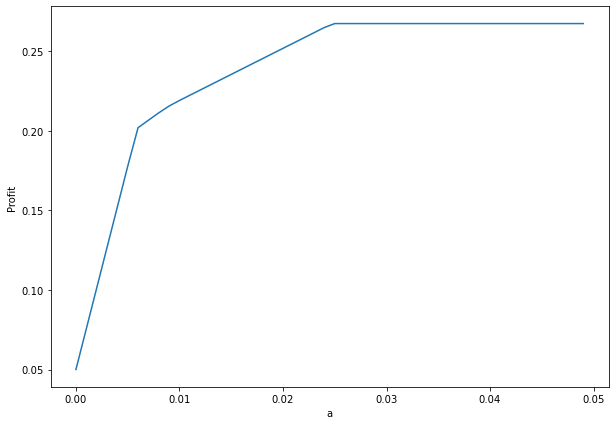

In [6]:
#定义a的取值
a = 0
profit_list = [] #记录最大收益
a_list = [] #记录a的取值
 
while a<0.05:
    #定义决策变量取值范围
    x1=(0,None)
 
    #定义目标函数系数
    c=np.array([-0.05,-0.27,-0.19,-0.185,-0.185]) 
    
    
    #定义不等式约束条件左边系数
    A = np.hstack((np.zeros((4,1)),np.diag([0.025,0.015,0.055,0.026])))
    #定义不等式约束条件右边系数
    b=a*np.ones((4,1));
    
    
    #定义等式约束条件左边系数
    Aeq=np.array([[1,1.01,1.02,1.045,1.065]])
    #定义等式约束条件右边系数
    beq=np.array([1]);
    
    #求解
    res=op.linprog(c,A,b,Aeq,beq,bounds=(x1,x1,x1,x1,x1))
    profit = -res.fun
    profit_list.append(profit)
    a_list.append(a)
    a = a+0.001
 
#绘制风险偏好a与最大收益的曲线图    
plt.figure(figsize=(10,7))
plt.plot(a_list,profit_list)
plt.xlabel('a');plt.ylabel('Profit')

## 运输问题

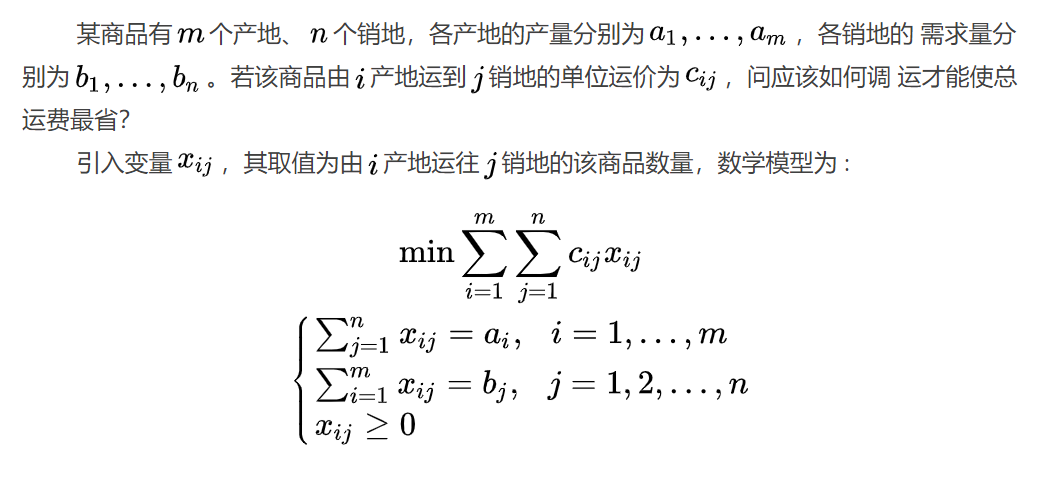

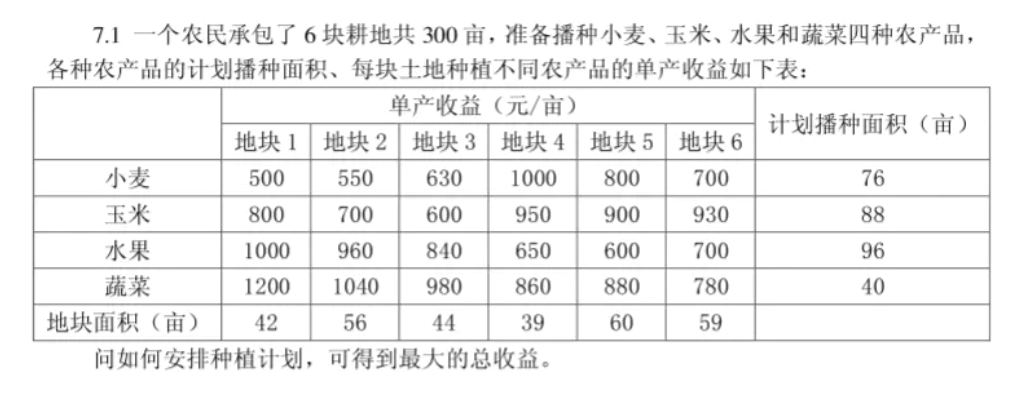

### pulp

In [7]:
import pulp
import numpy as np
from pprint import pprint

In [8]:
def transportation_problem(costs, x_max, y_max):

    row = len(costs)
    col = len(costs[0])

    prob = pulp.LpProblem('Transportation Problem', sense=pulp.LpMaximize)

    var = [[pulp.LpVariable(f'x{i}{j}', lowBound=0, cat=pulp.LpInteger)
            for j in range(col)] for i in range(row)]

    def flatten(x): return [y for l in x for y in flatten(
        l)] if type(x) is list else [x]

    prob += pulp.lpDot(flatten(var), costs.flatten())

    for i in range(row):
        prob += (pulp.lpSum(var[i]) <= x_max[i])

    for j in range(col):
        prob += (pulp.lpSum([var[i][j] for i in range(row)]) <= y_max[j])

    prob.solve()

    return {'objective': pulp.value(prob.objective), 'var': [[pulp.value(var[i][j]) for j in range(col)] for i in range(row)]}

In [9]:
if __name__ == '__main__':
    costs = np.array([[500, 550, 630, 1000, 800, 700],
                      [800, 700, 600, 950, 900, 930],
                      [1000, 960, 840, 650, 600, 700],
                      [1200, 1040, 980, 860, 880, 780]])

    max_plant = [76, 88, 96, 40]
    max_cultivation = [42, 56, 44, 39, 60, 59]
    res = transportation_problem(costs, max_plant, max_cultivation)

    print(f'最大值为{res["objective"]}')
    print('各变量的取值为：')
    pprint(res['var'])

# output:
# 最大值为284230.0
# 各变量的取值为：
# [[0.0, 0.0, 6.0, 39.0, 31.0, 0.0],
# [0.0, 0.0, 0.0, 0.0, 29.0, 59.0],
# [2.0, 56.0, 38.0, 0.0, 0.0, 0.0],
# [40.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

最大值为284230.0
各变量的取值为：
[[0.0, 0.0, 6.0, 39.0, 31.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 29.0, 59.0],
 [2.0, 56.0, 38.0, 0.0, 0.0, 0.0],
 [40.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


E:\Anaconda\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## 指派问题

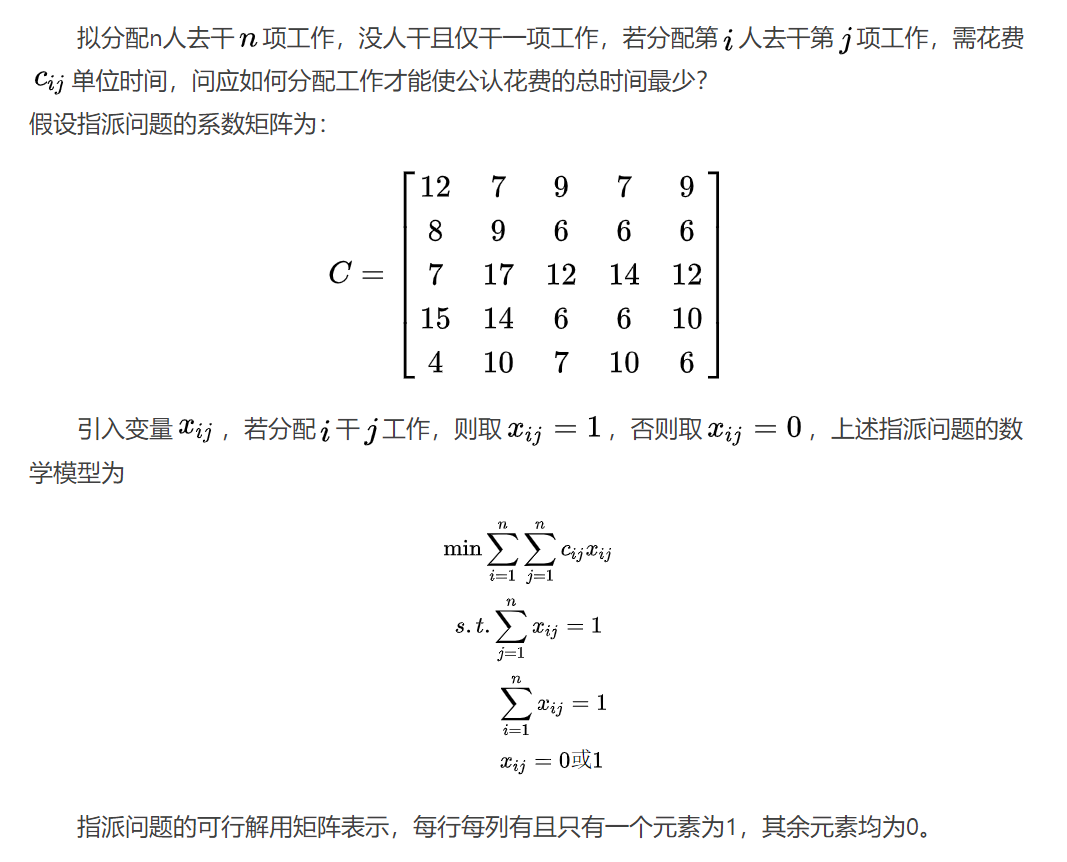

### scipy

In [10]:
import numpy as np
from scipy.optimize import linear_sum_assignment

In [11]:
efficiency_matrix = np.array([
    [12,7,9,7,9],
    [8,9,6,6,6],
    [7,17,12,14,12],
    [15,14,6,6,10],
    [4,10,7,10,6]
])

row_index, col_index=linear_sum_assignment(efficiency_matrix)
print(row_index+1)
print(col_index+1)
print(efficiency_matrix[row_index,col_index])
print(efficiency_matrix[row_index, col_index].sum())

#output：
#[1 2 3 4 5]
#[2 3 1 4 5]
#[7 6 7 6 6]
# 32

[1 2 3 4 5]
[2 3 1 4 5]
[7 6 7 6 6]
32


### pulp

In [12]:
def assignment_problem(efficiency_matrix):
    row = len(efficiency_matrix)
    col = len(efficiency_matrix[0])

    def flatten(x): return [y for l in x for y in flatten(
        l)] if type(x) is list else [x]

    m = pulp.LpProblem('assignment', sense=pulp.LpMinimize)
    var_x = [[pulp.LpVariable(f'x{i}{j}', cat=pulp.LpBinary)
              for j in range(col)] for i in range(row)]

    m += pulp.lpDot(efficiency_matrix.flatten(), flatten(var_x))

    for i in range(row):
        m += (pulp.lpDot(var_x[i], [1]*col) == 1)

    for j in range(col):
        m += (pulp.lpDot([var_x[i][j] for i in range(row)], [1]*row) == 1)

    m.solve()

    print(m)

    return {'objective': pulp.value(m.objective), 'var': [[pulp.value(var_x[i][j]) for j in range(col)] for i in range(row)]}

In [13]:
efficiency_matrix = np.array([
    [12, 7, 9, 7, 9],
    [8, 9, 6, 6, 6],
    [7, 17, 12, 14, 9],
    [15, 14, 6, 6, 10],
    [4, 10, 7, 10, 9]
])

res = assignment_problem(efficiency_matrix)
print(f'最小值{res["objective"]}')
print(res['var'])

#output
#最小值32.0
#[[0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0]]

assignment:
MINIMIZE
12*x00 + 7*x01 + 9*x02 + 7*x03 + 9*x04 + 8*x10 + 9*x11 + 6*x12 + 6*x13 + 6*x14 + 7*x20 + 17*x21 + 12*x22 + 14*x23 + 9*x24 + 15*x30 + 14*x31 + 6*x32 + 6*x33 + 10*x34 + 4*x40 + 10*x41 + 7*x42 + 10*x43 + 9*x44 + 0
SUBJECT TO
_C1: x00 + x01 + x02 + x03 + x04 = 1

_C2: x10 + x11 + x12 + x13 + x14 = 1

_C3: x20 + x21 + x22 + x23 + x24 = 1

_C4: x30 + x31 + x32 + x33 + x34 = 1

_C5: x40 + x41 + x42 + x43 + x44 = 1

_C6: x00 + x10 + x20 + x30 + x40 = 1

_C7: x01 + x11 + x21 + x31 + x41 = 1

_C8: x02 + x12 + x22 + x32 + x42 = 1

_C9: x03 + x13 + x23 + x33 + x43 = 1

_C10: x04 + x14 + x24 + x34 + x44 = 1

VARIABLES
0 <= x00 <= 1 Integer
0 <= x01 <= 1 Integer
0 <= x02 <= 1 Integer
0 <= x03 <= 1 Integer
0 <= x04 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x20 <= 1 Integer
0 <= x21 <= 1 Integer
0 <= x22 <= 1 Integer
0 <= x23 <= 1 Integer
0 <= x24 <= 1 Integer
0 <= x30 <= 1 Integer
0 <= x31 <= 1 

## 0/1 规划

### pulp

In [1]:
from pulp import *

In [6]:
my_MipProblem = LpProblem("2/2_problem", LpMinimize)

solution = []

x1 = LpVariable("X1", lowBound=0, cat=LpInteger)
x2 = LpVariable("X2", cat=LpBinary)
x3 = LpVariable("X3", lowBound=0)

my_MipProblem += 2*x1 + 1*x2 + 2*x3

my_MipProblem += 1*x1 + 2*x2 + 4*x3 >= 8
my_MipProblem += 1*x1 + 1*x2 + 1*x3 == 6

my_MipProblem.solve()

print("Status:", LpStatus[my_MipProblem.status])

for v in my_MipProblem.variables():
    print(v.name, "=", v.varValue)
    solution.append(v.varValue)

print("objective=", value(my_MipProblem.objective))

Status: Optimal
X1 = 4.0
X2 = 1.0
X3 = 1.0
objective= 11.0


## 求解数独

In [17]:

# Import PuLP modeler functions
from pulp import *

# A list of strings from "1" to "9" is created
Sequence = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

# The Vals, Rows and Cols sequences all follow this form
Vals = Sequence
Rows = Sequence
Cols = Sequence

# The boxes list is created, with the row and column index of each square in each box
Boxes =[]
for i in range(3):
    for j in range(3):
        Boxes += [[(Rows[3*i+k],Cols[3*j+l]) for k in range(3) for l in range(3)]]

# The prob variable is created to contain the problem data        
prob = LpProblem("Sudoku_Problem",LpMinimize)

# The problem variables are created
choices = LpVariable.dicts("Choice",(Vals,Rows,Cols),0,1,LpInteger)

# The arbitrary objective function is added
prob += 0, "Arbitrary_Objective_Function"

# A constraint ensuring that only one value can be in each square is created
for r in Rows:
    for c in Cols:
        prob += lpSum([choices[v][r][c] for v in Vals]) == 1, ""

# The row, column and box constraints are added for each value
for v in Vals:
    for r in Rows:
        prob += lpSum([choices[v][r][c] for c in Cols]) == 1,""
        
    for c in Cols:
        prob += lpSum([choices[v][r][c] for r in Rows]) == 1,""

    for b in Boxes:
        prob += lpSum([choices[v][r][c] for (r,c) in b]) == 1,""
                        
# The starting numbers are entered as constraints                
# prob += choices["5"]["1"]["1"] == 1,""#5放在第一行第一列
# prob += choices["6"]["2"]["1"] == 1,""#6放在第二行第一列
# prob += choices["8"]["4"]["1"] == 1,""
# prob += choices["4"]["5"]["1"] == 1,""

# prob += choices["7"]["6"]["1"] == 1,""
# prob += choices["3"]["1"]["2"] == 1,""
# prob += choices["9"]["3"]["2"] == 1,""
# prob += choices["6"]["7"]["2"] == 1,""
# prob += choices["8"]["3"]["3"] == 1,""
# prob += choices["1"]["2"]["4"] == 1,""
# prob += choices["8"]["5"]["4"] == 1,""
# prob += choices["4"]["8"]["4"] == 1,""
# prob += choices["7"]["1"]["5"] == 1,""
# prob += choices["9"]["2"]["5"] == 1,""
# prob += choices["6"]["4"]["5"] == 1,""
# prob += choices["2"]["6"]["5"] == 1,""
# prob += choices["1"]["8"]["5"] == 1,""
# prob += choices["8"]["9"]["5"] == 1,""
# prob += choices["5"]["2"]["6"] == 1,""
# prob += choices["3"]["5"]["6"] == 1,""
# prob += choices["9"]["8"]["6"] == 1,""
# prob += choices["2"]["7"]["7"] == 1,""
# prob += choices["6"]["3"]["8"] == 1,""
# prob += choices["8"]["7"]["8"] == 1,""
# prob += choices["7"]["9"]["8"] == 1,""
# prob += choices["3"]["4"]["9"] == 1,""
# prob += choices["1"]["5"]["9"] == 1,""
# prob += choices["6"]["6"]["9"] == 1,""
# prob += choices["5"]["8"]["9"] == 1,""

prob += choices["4"]["2"]["2"] == 1,""
prob += choices["9"]["3"]["5"] == 1,""
prob += choices["8"]["4"]["7"] == 1,""
prob += choices["6"]["6"]["3"] == 1,""
prob += choices["2"]["7"]["5"] == 1,""
prob += choices["5"]["8"]["8"] == 1,""

prob.writeLP("Sudoku.lp")

prob.solve()

print("Status:", LpStatus[prob.status])

sudokuout = open('sudokuout.txt','w')

for r in Rows:
    if r == "1" or r == "4" or r == "7":
                    sudokuout.write("+-----+------+------+\n")
    for c in Cols:
        for v in Vals:
            if value(choices[v][r][c])==1:
                               
                if c == "1" or c == "4" or c =="7":
                    sudokuout.write("| ")
                    
                sudokuout.write(v + " ")
                
                if c == "9":
                    sudokuout.write("|\n")
sudokuout.write("+-----+------+------+")                    
sudokuout.close()

print("Solution Written to sudokuout.txt")

with open("sudokuout.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一个元素的换行符
        print(line)

Status: Optimal
Solution Written to sudokuout.txt
+-----+------+------+
| 8 5 2 | 4 6 7 | 3 9 1 |
| 3 4 9 | 2 1 5 | 6 8 7 |
| 1 6 7 | 3 9 8 | 5 4 2 |
+-----+------+------+
| 2 7 5 | 6 4 9 | 8 1 3 |
| 4 1 8 | 5 3 2 | 9 7 6 |
| 9 3 6 | 8 7 1 | 4 2 5 |
+-----+------+------+
| 5 8 3 | 7 2 4 | 1 6 9 |
| 6 2 1 | 9 8 3 | 7 5 4 |
| 7 9 4 | 1 5 6 | 2 3 8 |
+-----+------+------+
